In [2]:
import pandas as pd

#Pandas的应用-1
#Pandas核心的数据类型是Series（数据系列）、DataFrame（数据表/数据框），分别用于处理一维和二维的数据，除此之外还有一个名为Index的类型及其子类型，它为Series和DataFrame提供了索引功能。日常工作中以DataFrame使用最为广泛，因为二维的数据本质就是一个有行有列的表格（想一想Excel电子表格和关系型数据库中的二维表）。上述这些类型都提供了大量的处理数据的方法，数据分析师可以以此为基础实现对数据的各种常规处理。

#方法一：通过列表或数组创建Series对象
ser1 = pd.Series(data=[320, 100, 300, 340], index=['一季度', '二季度', '三季度', '四季度'])
ser1

一季度    320
二季度    100
三季度    300
四季度    340
dtype: int64

In [4]:
#方法二：通过字典创建Series对象
# 字典中的键就是数据的索引（标签），字典中的值就是数据
ser2 = pd.Series({'一季度': 320, '二季度': 180, '三季度': 300, '四季度': 405})
ser2

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64

In [6]:
#使用整数索引
print(ser2.iloc[0], ser2.iloc[1], ser2.iloc[2], ser2.iloc[3])
ser2.iloc[0], ser2.iloc[3] = 350, 360
print(ser2)

350 180 300 360
一季度    350
二季度    180
三季度    300
四季度    360
dtype: int64


In [5]:
#使用自定义的标签索引
print(ser2['一季度'], ser2['三季度'])
ser2['一季度'] = 380
print(ser2)

350 300
一季度    380
二季度    180
三季度    300
四季度    360
dtype: int64


In [6]:
#切片操作
print(ser2[1:3])
print(ser2['二季度':'四季度'])

二季度    180
三季度    300
dtype: int64
二季度    180
三季度    300
四季度    360
dtype: int64


In [7]:
ser2[1:3] = 400, 500
ser2

一季度    380
二季度    400
三季度    500
四季度    360
dtype: int64

In [11]:
#花式索引
print(ser2[['二季度', '四季度']])
ser2[['二季度', '四季度']] = 500, 520
print(ser2)

二季度    500
四季度    520
dtype: int64
一季度    380
二季度    500
三季度    500
四季度    520
dtype: int64


In [12]:
#布尔索引
ser2[ser2 >= 500]

二季度    500
三季度    500
四季度    520
dtype: int64

In [17]:
# 求和
print(ser2.sum())
# 求均值
print(ser2.mean())
# 求最大
print(ser2.max())
# 求最小
print(ser2.min())
# 计数
print(ser2.count())
# 求标准差
print(ser2.std())
# 求方差
print(ser2.var())
# 求中位数
print(ser2.median())

1900
475.0
520
380
4
64.03124237432849
4100.0
500.0


In [31]:
#Series对象还有一个名为describe()的方法，可以获得上述所有的描述性统计信息，如下所示。
print(ser2.describe())
ser2.describe()['mean']  #因为describe()返回的也是一个Series对象，所以也可以用ser2.describe()['mean']来获取平均值。

count      4.000000
mean     475.000000
std       64.031242
min      380.000000
25%      470.000000
50%      500.000000
75%      505.000000
max      520.000000
dtype: float64


475.0

In [41]:
ser3 = pd.Series(data=['apple', 'banana', 'apple', 'pitaya', 'apple', 'pitaya', 'durian'])
ser3.value_counts()

apple     3
pitaya    2
banana    1
durian    1
Name: count, dtype: int64

In [34]:
ser3.unique()  #我们可以使用unique()方法获得去重之后的Series对象

array(['apple', 'banana', 'pitaya', 'durian'], dtype=object)

In [35]:
ser3.nunique()  #可以使用nunique()方法统计不重复值的数量

4

In [37]:
#Series对象的isnull()和notnull()方法可以用于空值的判断，代码如下所示。
import numpy as np

ser4 = pd.Series(data=[10, 20, np.NaN, 30, np.NaN])
ser4.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [38]:
ser4.notnull()

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [ ]:
#Series对象的dropna()和fillna()方法分别用来删除空值和填充空值，具体的用法如下所示。

In [39]:
#需要提醒大家注意的是，dropna()和fillna()方法都有一个名为inplace的参数，它的默认值是False，表示删除空值或填充空值不会修改原来的Series对象，而是返回一个新的Series对象来表示删除或填充空值后的数据系列，如果将inplace参数的值修改为True，那么删除或填充空值会就地操作，直接修改原来的Series对象，那么方法的返回值是None。后面我们会接触到的很多方法，包括DataFrame对象的很多方法都会有这个参数，它们的意义跟这里是一样的。
ser4.dropna(inplace=True)

0    10.0
1    20.0
3    30.0
dtype: float64

In [42]:
ser4.fillna(40)

0    10.0
1    20.0
2    40.0
3    30.0
4    40.0
dtype: float64

In [50]:
# backfill或bfill表示用后一个元素的值填充空值
# ffill或pad表示用前一个元素的值填充空值
ser4.ffill()
ser4.bfill()

0    10.0
1    20.0
2    30.0
3    30.0
4     NaN
dtype: float64

In [33]:
#Series对象的mask()和where()方法可以将满足或不满足条件的值进行替换，如下所示。
import pandas as pd

ser5 = pd.Series(range(5))
print(ser5.where(ser5 > 0))
print(ser5)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64
0    0
1    1
2    2
3    3
4    4
dtype: int64


In [38]:
#where方法ser5的取值范围的反方向用第二个参数的值覆盖
print(ser5.where(ser5 > 1, 10))
print(ser5)

0    10
1    10
2     2
3     3
4     4
dtype: int64
0    0
1    1
2    2
3    3
4    4
dtype: int64


In [39]:
#mask方法ser5的取值范围用第二个参数的值覆盖
ser5.mask(ser5 > 1, 10)

0     0
1     1
2    10
3    10
4    10
dtype: int64

In [44]:
#Series对象的duplicated()方法可以帮助我们找出重复的数据，而drop_duplicates()方法可以帮我们删除重复数据。
ser6 = pd.Series(data=[10, 14, 14, 15, 15], index=['a', 'b', 'c', 'd', 'e'])
ser6.duplicated()

a    False
b    False
c     True
d    False
e     True
dtype: bool

In [45]:
#drop_duplicates()方法可以帮我们删除重复数据。
ser6 = pd.Series(data=[10, 14, 14, 15, 15], index=['a', 'b', 'c', 'd', 'e'])
ser6.drop_duplicates()

a    10
b    14
d    15
dtype: int64

In [47]:
import numpy as np

ser6 = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
ser6

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [7]:
import pandas as pd

#在这个例子中，我们将一个名为 "数量" 的 Series 添加到一个 DataFrame 中，Series 的名称自动成为 DataFrame 的列名。
s = pd.Series([1, 2, 3], name='数量')
df = pd.DataFrame(s)
df

,数量
0,1
1,2
2,3


In [33]:
#Series对象的apply()和map()方法非常重要，它们可以用于数据处理，把数据映射或转换成我们期望的样子，这个操作在数据分析的数据准备阶段非常重要。
import numpy as np
import pandas as pd

ser6 = pd.Series(['cat', 'dog', np.nan, 'rabbit'], name='hello')
ser6

0       cat
1       dog
2       NaN
3    rabbit
Name: hello, dtype: object

In [38]:
ser6.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
Name: hello, dtype: object

In [40]:
ser6.map('I am a {}'.format, na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
Name: hello, dtype: object

In [20]:
ser7 = pd.Series([20, 21, 12], index=['London', 'New York', 'Helsinki'])
ser7

London      20
New York    21
Helsinki    12
dtype: int64

In [25]:
ser7.apply(lambda x: x ** 2)

London      400
New York    441
Helsinki    144
dtype: int64

In [42]:
ser7.apply(lambda x, value: x - value, args=(6,))

London      14
New York    15
Helsinki     6
dtype: int64

In [45]:
def add_custom_values(x, **kwargs):
    for month in kwargs:
        x += kwargs[month]
    return x


ser7.apply(add_custom_values, june=30, july=20, august=25)

London      95
New York    96
Helsinki    87
dtype: int64

In [49]:
#排序和取头部值的方法
#Series对象的sort_index()和sort_values()方法可以用于对索引和数据的排序，排序方法有一个名为ascending的布尔类型参数，该参数用于控制排序的结果是升序还是降序；而名为kind的参数则用来控制排序使用的算法，默认使用了quicksort，也可以选择mergesort或heapsort；如果存在空值，那么可以用na_position参数空值放在最前还是最后，默认是last，代码如下所示。
ser8 = pd.Series(
    data=[35, 96, 12, 57, 25, 89],
    index=['grape', 'banana', 'pitaya', 'apple', 'peach', 'orange']
)
# 按值从小到大排序
ser8.sort_values()  #ascending=False反向排序

banana    96
orange    89
apple     57
grape     35
peach     25
pitaya    12
dtype: int64

In [52]:
ser8.sort_index(ascending=False)  #ascending=False反向排序

pitaya    12
peach     25
orange    89
grape     35
banana    96
apple     57
dtype: int64

In [57]:
ser8.describe()

count     6.000000
mean     52.333333
std      34.488645
min      12.000000
25%      27.500000
50%      46.000000
75%      81.000000
max      96.000000
dtype: float64

In [58]:
ser8.nlargest(3)

banana    96
orange    89
apple     57
dtype: int64

In [59]:
ser8.nsmallest(3)

pitaya    12
peach     25
grape     35
dtype: int64

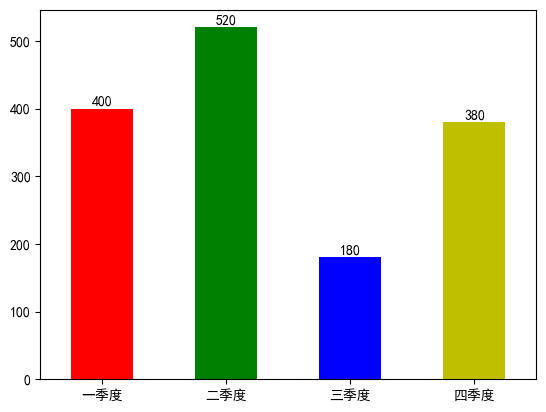

In [77]:
#绘制图表
#Series对象有一个名为plot的方法可以用来生成图表，如果选择生成折线图、饼图、柱状图等，默认会使用Series对象的索引作为横坐标，使用Series对象的数据作为纵坐标。
import matplotlib.pyplot as plt

# 配置支持中文的非衬线字体（默认的字体无法显示中文）
plt.rcParams['font.sans-serif'] = ['SimHei', ]
# 使用指定的中文字体时需要下面的配置来避免负号无法显示
plt.rcParams['axes.unicode_minus'] = False
#创建Series对象并绘制对应的柱状图。
ser9 = pd.Series({'一季度': 400, '二季度': 520, '三季度': 180, '四季度': 380})
# 通过Series对象的plot方法绘图（kind='bar'表示绘制柱状图）
ser9.plot(kind='bar', color=['r', 'g', 'b', 'y'])
# x轴的坐标旋转到0度（中文水平显示）
plt.xticks(rotation=0)
# 在柱状图的柱子上绘制数字
for i in range(4):
    plt.text(i, ser9.iloc[i] + 5, ser9.iloc[i], ha='center')  #ha=horizontalalignment
# 显示图像
plt.show()

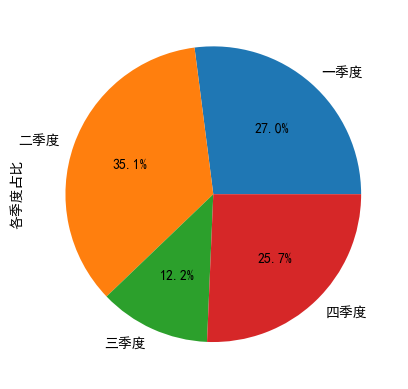

In [82]:
#绘制反映每个季度占比的饼图
# autopct参数可以配置在饼图上显示每块饼的占比
ser9.plot(kind='pie', autopct='%.1f%%')
# 设置y轴的标签（显示在饼图左侧的文字）
plt.ylabel('各季度占比')
plt.show()

In [84]:
#Pandas的应用-2
#DataFrame的应用
#通过二维数组创建DataFrame对象
scores = np.random.randint(60, 101, (5, 3))
courses = ['语文', '数学', '英语']
ids = [1001, 1002, 1003, 1004, 1005]
df1 = pd.DataFrame(scores, columns=courses, index=ids)
df1

,语文,数学,英语
1001,98,65,81
1002,94,98,88
1003,60,76,98
1004,62,70,100
1005,66,75,85


In [85]:
#通过字典创建DataFrame对象
scores = {
    '语文': [62, 72, 93, 88, 93],
    '数学': [95, 65, 86, 66, 87],
    '英语': [66, 75, 82, 69, 82],
}
ids = [1001, 1002, 1003, 1004, 1005]
df2 = pd.DataFrame(data=scores, index=ids)
df2

,语文,数学,英语
1001,62,95,66
1002,72,65,75
1003,93,86,82
1004,88,66,69
1005,93,87,82


In [ ]:
#读取 CSV 文件创建DataFrame对象
#可以通过pandas 模块的read_csv函数来读取 CSV 文件，read_csv函数的参数非常多，下面接受几个比较重要的参数。
#sep / delimiter：分隔符，默认是,。
#header：表头（列索引）的位置，默认值是infer，用第一行的内容作为表头（列索引）。
#index_col：用作行索引（标签）的列。
#usecols：需要加载的列，可以使用序号或者列名。
#true_values / false_values：哪些值被视为布尔值True / False。
#skiprows：通过行号、索引或函数指定需要跳过的行。
#skipfooter：要跳过的末尾行数。
#nrows：需要读取的行数。
#na_values：哪些值被视为空值。


In [ ]:
#读取Excel文件创建DataFrame对象
#可以通过pandas 模块的read_excel函数来读取 Exce l文件，该函数与上面的read_csv非常相近，多了一个sheet_name参数来指定数据表的名称，但是不同于 CSV 文件，没有sep或delimiter这样的参数。下面的代码中，read_excel函数的skiprows参数是一个 Lambda 函数，通过该 Lambda 函数指定只读取 Excel 文件的表头和其中10%的数据，跳过其他的数据。
import random

df4 = pd.read_excel(
    io='小宝剑大药房2018年销售数据.xlsx',
    usecols=['购药时间', '社保卡号', '商品名称', '销售数量', '应收金额', '实收金额'],
    skiprows=lambda x: x > 0 and random.random() > 0.1
)
df4

In [86]:
#通过SQL从数据库读取数据创建DataFrame对象
#pandas模块的read_sql函数可以通过 SQL 语句从数据库中读取数据创建DataFrame对象，该函数的第二个参数代表了需要连接的数据库。对于 MySQL 数据库，我们可以通过pymysql或mysqlclient来创建数据库连接，得到一个Connection 对象，而这个对象就是read_sql函数需要的第二个参数，代码如下所示。
import pymysql

# 创建一个MySQL数据库的连接对象
conn = pymysql.connect(
    host='47.104.31.138', port=3306,
    user='guest', password='Guest.618',
    database='hrs', charset='utf8mb4'
)
# 通过SQL从数据库读取数据创建DataFrame
df5 = pd.read_sql('select * from tb_emp', conn, index_col='eno')
df5

OperationalError: (2003, "Can't connect to MySQL server on '47.104.31.138' (timed out)")

In [ ]:
#，首先需要了解的是info()方法，它可以帮助我们了解DataFrame的相关信息，如下所示。

In [ ]:
import pymysql

conn = pymysql.connect(
    host='47.104.31.138', port=3306,
    user='guest', password='Guest.618',
    database='hrs', charset='utf8mb4'
)
dept_df = pd.read_sql('select * from tb_dept', conn, index_col='dno')
emp_df = pd.read_sql('select * from tb_emp', conn, index_col='eno')
emp2_df = pd.read_sql('select * from tb_emp2', conn, index_col='eno')

In [ ]:
emp_df.info()


In [7]:
#异常值
#异常值在统计学上的全称是疑似异常值，也称作离群点（outlier），异常值的分析也称作离群点分析。异常值是指样本中出现的“极端值”，数据值看起来异常大或异常小，其分布明显偏离其余的观测值。实际工作中，有些异常值可能是由系统或人为原因造成的，但有些异常值却不是，它们能够重复且稳定的出现，属于正常的极端值，例如很多游戏产品中头部玩家的数据往往都是离群的极端值。所以，我们既不能忽视异常值的存在，也不能简单地把异常值从数据分析中剔除。重视异常值的出现，分析其产生的原因，常常成为发现问题进而改进决策的契机。

#异常值的检测有Z-score 方法、IQR 方法、DBScan 聚类、孤立森林等，这里我们对前两种方法做一个简单的介绍。
import numpy as np


def detect_outliers_zscore(data, threshold=3):
    avg_value = np.mean(data)
    std_value = np.std(data)
    z_score = np.abs((data - avg_value) / std_value)
    return data[z_score > threshold]


array02 = np.array([-7, 10, 15, 12, 18, 20, 5, 25, 100, 250,800])

if __name__ == '__main__':
    print(detect_outliers_zscore(array02))

[800]


In [106]:
#IQR 方法的原理

#IQR（Interquartile Range，四分位距）方法是一种常用的统计学方法，用于检测数据集中的异常值。它基于数据的四分位数，即 Q1（下四分位数）和 Q3（上四分位数）。计算 Q1 和 Q3：Q1 是数据集中第 25% 的值。Q3 是数据集中第 75% 的值。 IQR = Q3 - Q1
#下界：Q1 - 1.5 * IQR 上界：Q3 + 1.5 * IQR任何小于下界或大于上界的数据点都被认为是异常值。
#为什么是 1.5 倍 IQR？ 1.5 倍 IQR 是一个经验法则，通常用于识别“温和”的异常值。在箱线图中，1.5 倍 IQR 的边界也用于绘制“须”。如果需要检测更极端的异常值，可以使用 3 倍 IQR。
import numpy as np


def detect_outliers_iqr(data, whis=1.5):
    q1, q3 = np.quantile(data, [0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - whis * iqr, q3 + whis * iqr
    return data[(data < lower) | (data > upper)]


array01 = np.array([10, 15, 12, 18, 20, 5, 25, 100])

if __name__ == '__main__':
    print(detect_outliers_iqr(array01))

[100]


In [100]:
import numpy as np

data = np.array([10, 15, 12, 18, 20, 5, 25, 100])

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

print("异常值:", outliers)

异常值: [100]


In [ ]:
#如果要删除异常值，可以使用DataFrame对象的drop方法，该方法可以根据行索引或列索引删除指定的行或列。例如我们认为月薪低于2000或高于8000的是员工表中的异常值，可以用下面的代码删除对应的记录。
emp_df.drop(emp_df[(emp_df.sal > 8000) | (emp_df.sal < 2000)].index)

In [ ]:
#如果要替换掉异常值，可以通过给单元格赋值的方式来实现，也可以使用replace方法将指定的值替换掉。例如我们要将月薪为1800和9000的替换为月薪的平均值，补贴为800的替换为1000，代码如下所示。
avg_sal = np.mean(emp_df.sal).astype(int)
emp_df.replace({'sal': [1800, 9000], 'comm': 800}, {'sal': avg_sal, 'comm': 1000})

In [ ]:
#DataFrame的应用
#数据清洗
#通常，我们从 Excel、CSV 或数据库中获取到的数据并不是非常完美的，里面可能因为系统或人为的原因混入了重复值或异常值，也可能在某些字段上存在缺失值；再者，DataFrame中的数据也可能存在格式不统一、量纲不统一等各种问题。因此，在开始数据分析之前，对数据进行清洗就显得特别重要。
#可以使用DataFrame对象的isnull或isna方法来找出数据表中的缺失值，如下所示。
emp_df.isnull()
emp_df.isna()
#输出
eno     ename   job	    mgr     sal     comm    dno
1359	False	False	False	False	False	False
2056	False	False	False	False	False	False
3088	False	False	False	False	False	False
3211	False	False	False	False	True	False
3233	False	False	False	False	True	False
3244	False	False	False	False	True	False
3251	False	False	False	False	True	False
3344	False	False	False	False	False	False
3577	False	False	False	False	True	False
3588	False	False	False	False	True	False
4466	False	False	False	False	True	False
5234	False	False	False	False	True	False
5566	False	False	False	False	False	False
7800	False	False	True	False	False	False

In [ ]:
#相对应的，notnull和notna方法可以将非空的值标记为True。如果想删除这些缺失值，可以使用DataFrame对象的dropna方法，该方法的axis参数可以指定沿着0轴还是1轴删除，也就是说当遇到空值时，是删除整行还是删除整列，默认是沿0轴进行删除的，代码如下所示。
emp_df.dropna()
#输出：
eno     ename   job      mgr	 sal    comm     dno
1359	胡一刀  销售员	3344.0	1800   200.0	30
2056	乔峰    架构师	 7800.0	 5000	1500.0	 20
3088	李莫愁  设计师	2056.0	3500   800.0	20
3344	黄蓉    销售主管	7800.0	3000   800.0	30
5566	宋远桥  会计师	7800.0	4000   1000.0	10

In [ ]:
#在某些特定的场景下，我们可以对空值进行填充，对应的方法是fillna，填充空值时可以使用指定的值（通过value参数进行指定），也可以用表格中前一个单元格（通过设置参数method=ffill）或后一个单元格（通过设置参数method=bfill）的值进行填充，当代码如下所示。
emp_df.fillna(value=0)
#输出：
        ename    job        mgr      sal     comm    dno
eno
1359	胡一刀    销售员	   3344.0	1800	200.0	30
2056	乔峰	    分析师	    7800.0	 5000	 1500.0	 20
3088	李莫愁	   设计师	   2056.0	3500	800.0	20
3211	张无忌	   程序员	   2056.0	3200	0.0     20
3233	丘处机	   程序员	   2056.0	3400	0.0	    20
3244	欧阳锋	   程序员	   3088.0	3200	0.0     20
3251	张翠山	   程序员	   2056.0	4000	0.0	    20
3344	黄蓉	    销售主管   7800.0	3000	800.0	30
3577	杨过	    会计	     5566.0	  2200	  0.0	  10
3588	朱九真	   会计	    5566.0	 2500	 0.0	 10
4466	苗人凤	   销售员	   3344.0	2500	0.0	    30
5234	郭靖	    出纳	     5566.0	  2000	  0.0	  10
5566	宋远桥	   会计师	   7800.0	4000	1000.0	10
7800	张三丰	   总裁	    0.0      9000	 1200.0	 20

In [ ]:
#重复值
#接下来，我们先给之前的部门表添加两行数据，让部门表中名为“研发部”和“销售部”的部门各有两个。
dept_df.loc[50] = {'dname': '研发部', 'dloc': '上海'}
dept_df.loc[60] = {'dname': '销售部', 'dloc': '长沙'}
dept_df
#输出：
    dname  dloc
dno
10	会计部	北京
20	研发部	成都
30	销售部	重庆
40	运维部	天津
50	研发部	上海
60	销售部	长沙

In [ ]:
#现在，我们的数据表中有重复数据了，我们可以通过DataFrame对象的duplicated方法判断是否存在重复值，该方法在不指定参数时默认判断行索引是否重复，我们也可以指定根据部门名称dname判断部门是否重复，代码如下所示。
dept_df.duplicated('dname')
dno
10    False
20    False
30    False
40    False
50     True
60     True
dtype: bool

In [ ]:
#从上面的输出可以看到，50和60两个部门从部门名称上来看是重复的，如果要删除重复值，可以使用drop_duplicates方法，该方法的keep参数可以控制在遇到重复值时，保留第一项还是保留最后一项，或者多个重复项一个都不用保留，全部删除掉。
dept_df.drop_duplicates('dname')
#输出：
	dname	dloc
dno
10	会计部	北京
20	研发部	成都
30	销售部	重庆
40	运维部	天津
#将keep参数的值修改为last。
dept_df.drop_duplicates('dname', keep='last')
#输出：
	dname	dloc
dno
10	会计部	北京
40	运维部	天津
50	研发部	上海
60	销售部	长沙

In [ ]:
#上面的数据表一共有3140条数据，但并非所有的职位都是“数据分析”的岗位，如果要筛选出数据分析的岗位，可以通过检查positionName字段是否包含“数据分析”这个关键词，这里需要模糊匹配，应该如何实现呢？我们可以先获取positionName列，因为这个Series对象的dtype是字符串，所以可以通过str属性获取对应的字符串向量，然后就可以利用我们熟悉的字符串的方法来对其进行操作，代码如下所示。
#需要提醒大家的是，抽取出来的两列数据都是字符串类型的值，我们需要将其转换成int类型，才能计算平均值，对应的方法是DataFrame对象的applymap方法，该方法的参数是一个函数，而该函数会作用于DataFrame中的每个元素。完成这一步之后，我们就可以使用apply方法将上面的DataFrame处理成中间值，apply方法的参数也是一个函数，可以通过指定axis参数使其作用于DataFrame 对象的行或列，代码如下所示。
jobs_df = jobs_df[jobs_df.positionName.str.contains('数据分析')]
jobs_df.shape
temp_df = jobs_df.salary.str.extract(r'(\d+)[kK]?-(\d+)[kK]?').applymap(int)
#接下来，我们可以用上面的结果替换掉原来的salary列或者增加一个新的列来表示职位对应的工资，完整的代码如下所示。
jobs_df['salary'] = temp_df.apply(np.mean, axis=1)
jobs_df.head()
#输出：
    city    companyFullName              positionName    salary
0   北京	  达疆网络科技（上海）有限公司    数据分析岗       22.5
1   北京	  北京音娱时光科技有限公司        数据分析        14.0
2   北京	  北京千喜鹤餐饮管理有限公司	     数据分析        25.0
3   北京	  吉林省海生电子商务有限公司	     数据分析        41.5
4   北京	  韦博网讯科技（北京）有限公司	数据分析        12.5



In [29]:
df1 = pd.DataFrame(data=[[1,5],[2,6]],index=['小李','小张'])
df1

,0,1
小李,1,5
小张,2,6


In [45]:
df1.apply(lambda x: [1,2], axis=1)

小李    [1, 2]
小张    [1, 2]
dtype: object

In [11]:
#如果要对数据进行深度的分析和挖掘，字符串、日期时间这样的非数值类型都需要处理成数值，因为非数值类型没有办法计算相关性，也没有办法进行$\chi^2$检验等操作。对于字符串类型，通常可以其分为以下三类，再进行对应的处理。

#有序变量（Ordinal Variable）：字符串表示的数据有顺序关系，那么可以对字符串进行序号化处理。
#分类变量（Categorical Variable）/ 名义变量（Nominal Variable）：字符串表示的数据没有大小关系和等级之分，那么就可以使用独热编码的方式处理成哑变量（虚拟变量）矩阵。
#定距变量（Scale Variable）：字符串本质上对应到一个有大小高低之分的数据，而且可以进行加减运算，那么只需要将字符串处理成对应的数值即可。
#对于第1类和第3类，我们可以用上面提到的apply或transform方法来处理，也可以利用scikit-learn中的OrdinalEncoder处理第1类字符串，这个我们在后续的课程中会讲到。对于第2类字符串，可以使用pandas的get_dummies()函数来生成哑变量（虚拟变量）矩阵，代码如下所示。
import pandas as pd
persons_df = pd.DataFrame(
    data={
        '姓名': ['关羽', '张飞', '赵云', '马超', '黄忠'],
        '职业': ['医生', '医生', '程序员', '画家', '教师'],
        '学历': ['研究生', '大专', '研究生', '高中', '本科']
    }
)
persons_df

,姓名,职业,学历
0,关羽,医生,研究生
1,张飞,医生,大专
2,赵云,程序员,研究生
3,马超,画家,高中
4,黄忠,教师,本科


In [47]:
#将职业处理成哑变量矩阵。
pd.get_dummies(persons_df['职业'])

,医生,教师,画家,程序员
0,True,False,False,False
1,True,False,False,False
2,False,False,False,True
3,False,False,True,False
4,False,True,False,False


In [12]:
#将学历处理成大小不同的值。
def handle_education(x):
    edu_dict = {'高中':1, '本科':3, '大专':5 ,'研究生':10}
    return edu_dict.get(x)

persons_df['学历'].apply(handle_education)


0    10
1     5
2    10
3     1
4     3
Name: 学历, dtype: int64

In [ ]:
#我们再来说说数据离散化。离散化也叫分箱，如果变量的取值是连续值，那么它的取值有无数种可能，在进行数据分组的时候就会非常的不方便，这个时候将连续变量离散化就显得非常重要。之所以把离散化叫做分箱，是因为我们可以预先设置一些箱子，每个箱子代表了数据取值的范围，这样就可以将连续的值分配到不同的箱子中，从而实现离散化。下面的例子读取了2018年北京积分落户数据，我们可以根据落户积分对数据进行分组，具体的做法如下所示。
luohu_df = pd.read_csv('data/2018年北京积分落户数据.csv', index_col='id')
luohu_df.score.describe()
#输出
count    6019.000000
mean       95.654552
std         4.354445
min        90.750000
25%        92.330000
50%        94.460000
75%        97.750000
max       122.590000
Name: score, dtype: float64
#可以看出，落户积分的最大值是122.59，最小值是90.75，那么我们可以构造一个从90分到125分，每5分一组的7个箱子，pandas的cut函数可以帮助我们首先数据分箱，代码如下所示。‘
bins = np.arange(90, 126, 5)
pd.cut(luohu_df.score, bins, right=False)
#说明：cut函数的right参数默认值为True，表示箱子左开右闭；修改为False可以让箱子的右边界为开区间，左边界为闭区间，大家看看下面的输出就明白了。
#输出：
id
1       [120, 125)
2       [120, 125)
3       [115, 120)
4       [115, 120)
5       [115, 120)
           ...
6015      [90, 95)
6016      [90, 95)
6017      [90, 95)
6018      [90, 95)
6019      [90, 95)
Name: score, Length: 6019, dtype: category
Categories (7, interval[int64, left]): [[90, 95) < [95, 100) < [100, 105) < [105, 110) < [110, 115) < [115, 120) < [120, 125)]
#我们可以根据分箱的结果对数据进行分组，然后使用聚合函数对每个组进行统计，这是数据分析中经常用到的操作，下一个章节会为大家介绍。除此之外，pandas还提供了一个名为qcut的函数，可以指定分位数对数据进行分箱，有兴趣的读者可以自行研究。

In [13]:
#经过前面的学习，我们已经将数据准备就绪而且变成了我们想要的样子，接下来就是最为重要的数据分析阶段了。当我们拿到一大堆数据的时候，如何从数据中迅速的解读出有价值的信息，这就是数据分析要解决的问题。首先，我们可以获取数据的描述性统计信息，通过描述性统计信息，我们可以了解数据的集中趋势和离散趋势。
import numpy as np
import pandas as pd

scores = np.random.randint(50, 101, (5, 3))
names = ('关羽', '张飞', '赵云', '马超', '黄忠')
courses = ('语文', '数学', '英语')
df = pd.DataFrame(data=scores, columns=courses, index=names)
df

,语文,数学,英语
关羽,87,90,52
张飞,97,66,77
赵云,97,53,98
马超,98,100,89
黄忠,83,77,76


In [14]:
#计算每门课程成绩的平均分。
df.mean()

语文    92.4
数学    77.2
英语    78.4
dtype: float64

In [16]:
#计算每个学生成绩的平均分。
df.mean(axis=1)

关羽    76.333333
张飞    80.000000
赵云    82.666667
马超    95.666667
黄忠    78.666667
dtype: float64

In [18]:
#计算每门课程成绩的方差。
df.var()
#说明：通过方差可以看出，数学成绩波动最大，最不稳定。

语文     47.8
数学    348.7
英语    300.3
dtype: float64

In [20]:
#获取每门课程的描述性统计信息。
df.describe()

,语文,数学,英语
count,5.000000,5.000000,5.000000
mean,92.400000,77.200000,78.400000
std,6.913754,18.673511,17.329166
min,83.000000,53.000000,52.000000
25%,87.000000,66.000000,76.000000
50%,97.000000,77.000000,77.000000
75%,97.000000,90.000000,89.000000
max,98.000000,100.000000,98.000000


In [21]:
#排序和Top-N
#如果需要对数据进行排序，可以使用DataFrame对象的sort_values方法，该方法的by参数可以指定根据哪个列或哪些列进行排序，而ascending参数可以指定升序或是降序。例如，下面的代码展示了如何将学生表按语文成绩排降序。
df.sort_values(by='语文', ascending=False)

,语文,数学,英语
马超,98,100,89
张飞,97,66,77
赵云,97,53,98
关羽,87,90,52
黄忠,83,77,76


In [22]:
#算出总成绩并且将dataframe用总成绩降序排列
df['总成绩']=df.sum(axis=1)
df.sort_values(by='总成绩', ascending=False)

,语文,数学,英语,总成绩
马超,98,100,89,287
赵云,97,53,98,248
张飞,97,66,77,240
黄忠,83,77,76,236
关羽,87,90,52,229


In [23]:
#找出语文成绩前3名的学生信息。
df.nlargest(3, '语文')

,语文,数学,英语,总成绩
马超,98,100,89,287
张飞,97,66,77,240
赵云,97,53,98,248


In [24]:
#找出数学成绩最低的3名学生的信息。
df.nsmallest(3,'数学')

,语文,数学,英语,总成绩
赵云,97,53,98,248
张飞,97,66,77,240
黄忠,83,77,76,236


In [ ]:
#分组聚合操作
#我们先从 Excel 文件中读取一组销售数据，然后再为大家演示如何进行分组聚合操作。
df = pd.read_excel('2020年销售数据.xlsx')
df.head()
#输出：
    销售日期	 销售区域   销售渠道  销售订单     品牌    售价  销售数量
0   2020-01-01  上海       拼多多    182894-455  八匹马  99    83
1   2020-01-01  上海       抖音      205635-402  八匹马  219   29
2   2020-01-01  上海       天猫      205654-021  八匹马  169   85
3   2020-01-01  上海       天猫      205654-519  八匹马  169   14
4   2020-01-01  上海       天猫      377781-010  皮皮虾  249   61

#如果我们要统计每个销售区域的销售总额，可以先通过“售价”和“销售数量”计算出销售额，为DataFrame添加一个列，代码如下所示。
df['销售额'] = df['售价']*df['销售数量']
df.head()
#输出：
    销售日期	 销售区域   销售渠道  销售订单     品牌    售价  销售数量  销售额
0   2020-01-01  上海       拼多多    182894-455  八匹马  99    83        8217
1   2020-01-01  上海       抖音      205635-402  八匹马  219   29        6351
2   2020-01-01  上海       天猫      205654-021  八匹马  169   85        14365
3   2020-01-01  上海       天猫      205654-519  八匹马  169   14        2366
4   2020-01-01  上海       天猫      377781-010  皮皮虾  249   61        15189

#然后再根据“销售区域”列对数据进行分组，这里我们使用的是DataFrame对象的groupby方法。分组之后，我们取“销售额”这个列在分组内进行求和处理，代码和结果如下所示。
df.groupby('销售区域').销售额.sum()
#输出
销售区域
上海    11610489
北京    12477717
南京     1767301
安徽      895463
广东     1617949
江苏      537079
浙江      687862
福建    10178227
Name: 销售额, dtype: int64

#如果我们要统计每个月的销售总额，我们可以将“销售日期”作为groupby`方法的参数，当然这里需要先将“销售日期”处理成月，代码和结果如下所示。
df.groupby(df['销售日期'].dt.month).销售额.sum()
#输出：
销售日期
1     5409855
2     4608455
3     4164972
4     3996770
5     3239005
6     2817936
7     3501304
8     2948189
9     2632960
10    2375385
11    2385283
12    1691973
Name: 销售额, dtype: int64

#接下来我们将难度升级，统计每个销售区域每个月的销售总额，这又该如何处理呢？事实上，groupby方法的第一个参数可以是一个列表，列表中可以指定多个分组的依据，大家看看下面的代码和输出结果就明白了。
df.groupby(['销售区域', df['销售日期'].dt.month]).销售额.sum()
#输出
销售区域  销售日期
上海      1       1679125
          2       1689527
          3       1061193
          4       1082187
          5        841199
          6        785404
          7        863906
          8        734937
          9       1107693
         10       412108
         11       825169
         12       528041
北京     1       1878234
         2       1807787
         3       1360666
         4       1205989
         5        807300
         6       1216432
         7       1219083
         8        645727
         9        390077
        10       671608
        11       678668
        12       596146
南京     7        841032
        10       710962
        12       215307
安徽     4        341308
         5        554155
广东     3        388180
         8        469390
         9        365191
        11       395188
江苏     4        537079
浙江     3        248354
         8        439508
福建     1       1852496
         2       1111141
         3       1106579
         4        830207
         5       1036351
         6        816100
         7        577283
         8        658627
         9        769999
        10       580707
        11       486258
        12       352479
Name: 销售额, dtype: int64

#如果希望统计出每个区域的销售总额以及每个区域单笔金额的最高和最低，我们可以在DataFrame或Series对象上使用agg方法并指定多个聚合函数，代码和结果如下所示。
df.groupby('销售区域').销售额.agg(['sum', 'max', 'min'])
#输出
          sum        max        min
销售区域
上海      11610489   116303     948
北京      12477717   133411     690
南京      1767301    87527      1089
安徽      895463     68502      1683
广东      1617949    120807     990
江苏      537079     114312     3383
浙江      687862     90909      3927
福建      10178227   87527      897
#如果希望自定义聚合后的列的名字，可以使用如下所示的方法。
df.groupby('销售区域').销售额.agg(销售总额='sum', 单笔最高='max', 单笔最低='min')
#输出
          销售总额   单笔最高    单笔最低
销售区域
上海      11610489   116303     948
北京      12477717   133411     690
南京      1767301    87527      1089
安徽      895463     68502      1683
广东      1617949    120807     990
江苏      537079     114312     3383
浙江      687862     90909      3927
福建      10178227   87527      897

#如果需要对多个列使用不同的聚合函数，例如“统计每个销售区域销售额的平均值以及销售数量的最低值和最高值”，我们可以按照下面的方式来操作。

df.groupby('销售区域')[['销售额', '销售数量']].agg({
    '销售额': 'mean', '销售数量': ['max', 'min']
})

In [ ]:
#透视表和交叉表
#上面的例子中，“统计每个销售区域每个月的销售总额”会产生一个看起来很长的结果，在实际工作中我们通常把那些行很多列很少的表成为“窄表”，如果我们不想得到这样的一个“窄表”，可以使用DataFrame的pivot_table方法或者是pivot_table函数来生成透视表。透视表的本质就是对数据进行分组聚合操作，根据 A 列对 B 列进行统计，如果大家有使用 Excel 的经验，相信对透视表这个概念一定不会陌生。例如，我们要“统计每个销售区域的销售总额”，那么“销售区域”就是我们的 A 列，而“销售额”就是我们的 B 列，在pivot_table函数中分别对应index和values参数，这两个参数都可以是单个列或者多个列。
pd.pivot_table(df, index='销售区域', values='销售额', aggfunc='sum')

#注意：上面的结果操作跟之前用groupby的方式得到的结果有一些区别，groupby操作后，如果对单个列进行聚合，得到的结果是一个Series对象，而上面的结果是一个DataFrame 对象。

pd.pivot_table(df, index=['销售区域', df['销售日期'].dt.month], values='销售额', aggfunc='sum')

#上面的操作结果是一个DataFrame，但也是一个长长的“窄表”，如果希望做成一个行比较少列比较多的“宽表”，可以将index参数中的列放到columns参数中，代码如下所示。
pd.pivot_table(
    df, index='销售区域', columns=df['销售日期'].dt.month,
    values='销售额', aggfunc='sum', fill_value=0
)
#说明：pivot_table函数的fill_value=0会将空值处理为0。